In [37]:
#chunk 1

import pandas as pd

df = pd.read_csv('credit_score_data.csv')


In [38]:
#chunk 2

categorical_columns = ['sex', 'education', 'civil_status', 'work_disability', 'main_os']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


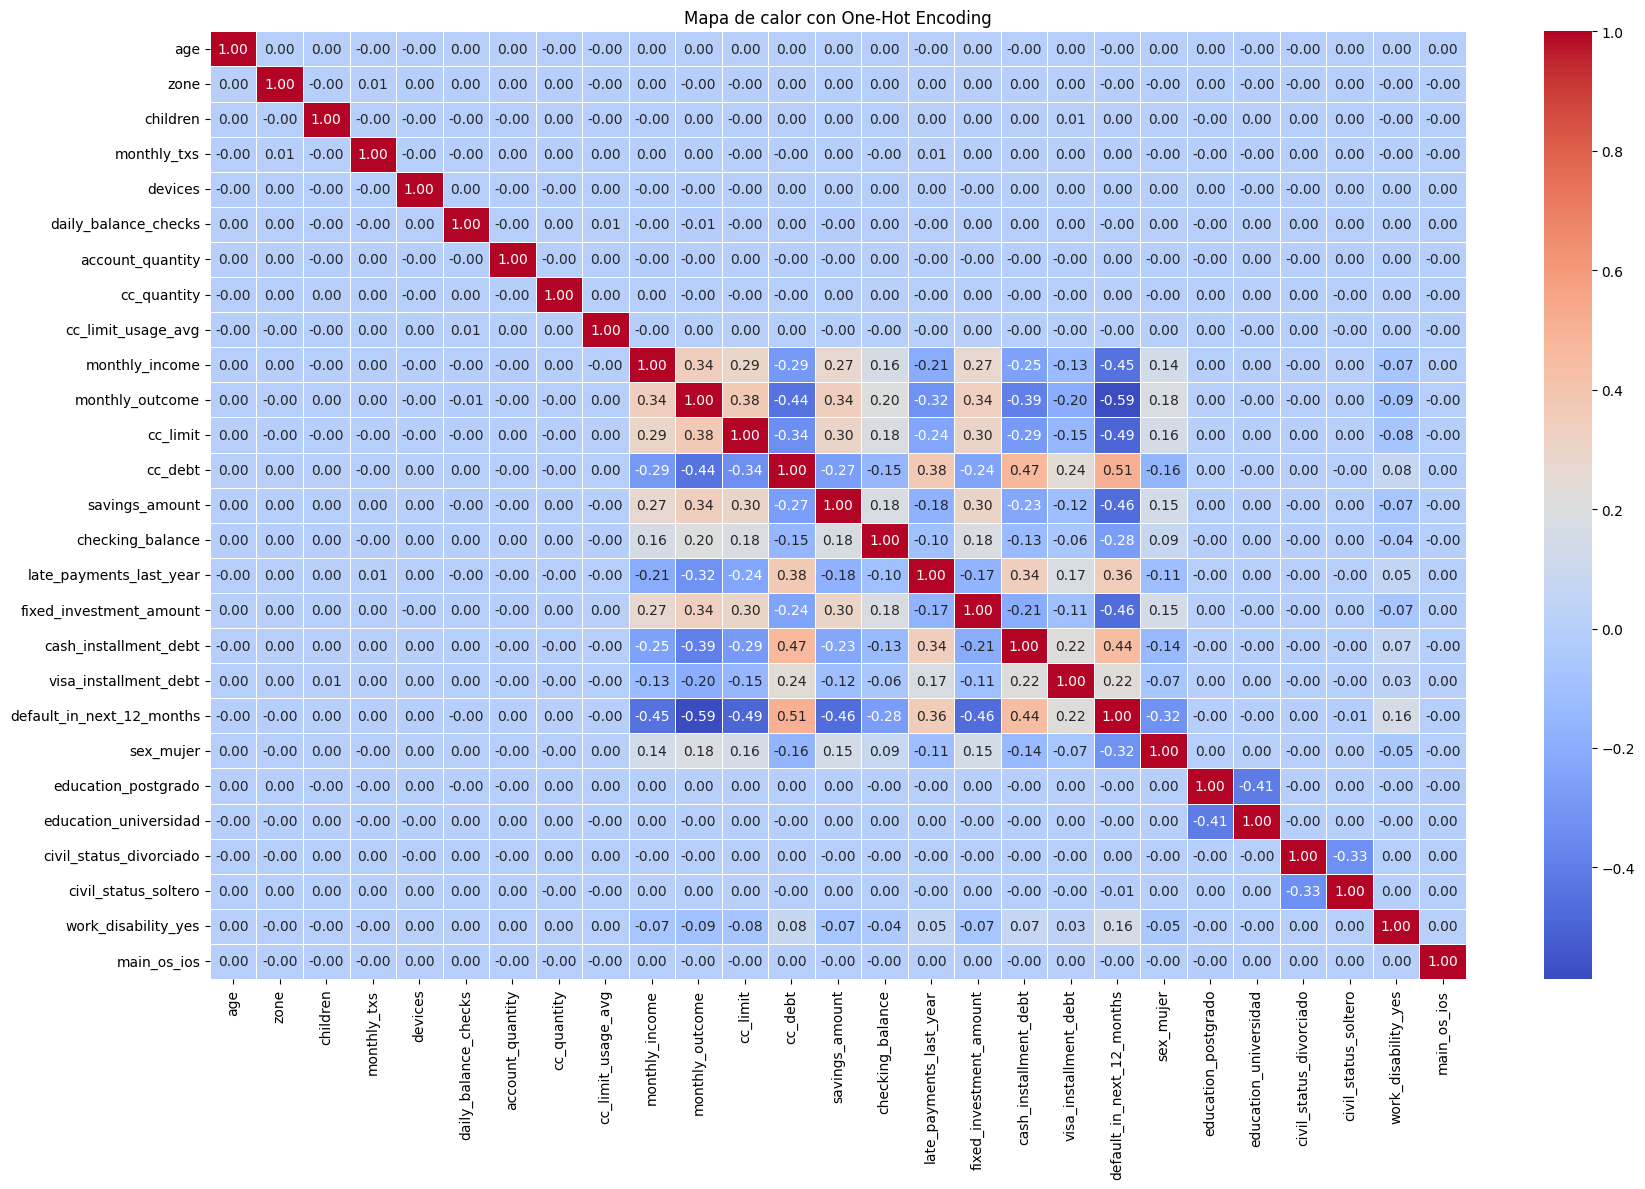

In [39]:
#chunk 3

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
sns.heatmap(df.drop(columns=['client_id']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor con One-Hot Encoding')
plt.tight_layout()
plt.show()


In [40]:
#chunk 4

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=['client_id', 'default_in_next_12_months'])
y = df['default_in_next_12_months']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)


c:\Users\luisp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [41]:
#chunk 5

from sklearn.metrics import roc_curve

y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
ks_statistic = max(tpr - fpr)

print(f'Estadístico KS: {ks_statistic:.6f}')


from sklearn.metrics import roc_auc_score

# Asegurar que tienes las probabilidades listas
y_scores_onehot = model.predict_proba(X_test)[:, 1]

# Calcular AUC
auc_score = roc_auc_score(y_test, y_scores_onehot)
print(f"AUC: {auc_score:.6f}")

Estadístico KS: 0.778415
AUC: 0.956172


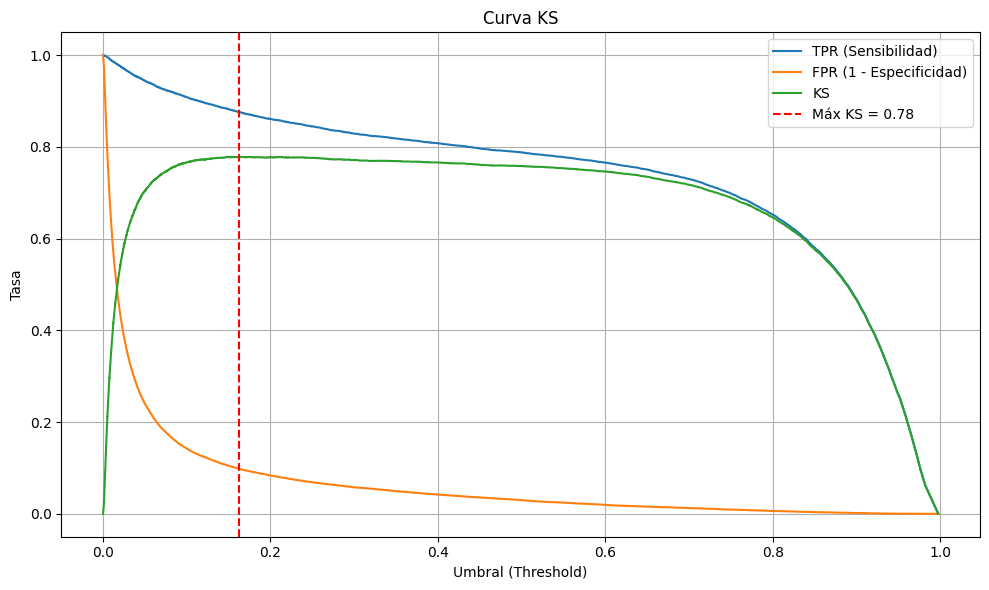

In [42]:
#chunk 6

import numpy as np
plt.figure(figsize=(10,6))
ks_values = tpr - fpr
ks_max_idx = np.argmax(ks_values)

plt.plot(thresholds, tpr, label='TPR (Sensibilidad)')
plt.plot(thresholds, fpr, label='FPR (1 - Especificidad)')
plt.plot(thresholds, ks_values, label='KS')
plt.axvline(thresholds[ks_max_idx], color='red', linestyle='--', label=f'Máx KS = {ks_values[ks_max_idx]:.2f}')
plt.xlabel('Umbral (Threshold)')
plt.ylabel('Tasa')
plt.title('Curva KS')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
#chunk 7

coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print(coef_df)


                   Variable  Coeficiente
15  late_payments_last_year     0.167210
5      daily_balance_checks     0.098124
2                  children     0.062668
4                   devices     0.056760
6          account_quantity     0.054164
24      work_disability_yes     0.047852
7               cc_quantity     0.045019
1                      zone     0.035320
21    education_universidad     0.016440
8        cc_limit_usage_avg     0.014878
0                       age     0.010676
25              main_os_ios     0.008666
23     civil_status_soltero     0.008021
20      education_postgrado     0.003784
22  civil_status_divorciado     0.002726
17    cash_installment_debt     0.000059
18    visa_installment_debt     0.000028
12                  cc_debt     0.000027
16  fixed_investment_amount    -0.000007
13           savings_amount    -0.000008
14         checking_balance    -0.000021
11                 cc_limit    -0.000026
9            monthly_income    -0.000035
10          mont

### **Comparación entre modelos: Label Encoding vs. One-Hot Encoding**

El objetivo de este ejercicio fue evaluar el impacto del tratamiento de variables categóricas en el rendimiento de un modelo de regresión logística aplicado a un problema de credit scoring. Se entrenaron dos modelos utilizando la misma estructura y conjunto de variables, pero aplicando distintas técnicas de codificación para las variables categóricas.

### **Modelo 1: Label Encoding**

En el primer enfoque, las variables categóricas fueron tratadas mediante Label Encoding manual, es decir, se asignaron números enteros a cada categoría (por ejemplo, hombre = 0, mujer = 1). Este método es rápido, simple y permite mantener la estructura del dataframe compacta, sin generar nuevas columnas.

Resultados:

KS: 0.780236

AUC: 0.957167

Este modelo tuvo un rendimiento notablemente alto en ambas métricas. El estadístico KS, que mide la máxima separación entre la distribución de probabilidades para los eventos positivos y negativos, fue muy cercano a 0.78, lo cual indica una excelente capacidad discriminativa. Asimismo, el AUC (Área Bajo la Curva ROC), que evalúa la capacidad global del modelo para clasificar correctamente, fue de 0.957, valor considerado excelente dentro de estándares de modelos de clasificación binaria.

### **Modelo 2: One-Hot Encoding**

En el segundo enfoque, se aplicó One-Hot Encoding, técnica que consiste en convertir cada categoría de una variable en una nueva columna binaria (0 o 1). Este método evita cualquier suposición de orden entre categorías, lo cual es crucial cuando se trabaja con datos nominales, como sexo o estado civil, donde no existe una jerarquía natural entre los valores posibles.

Resultados:

KS: 0.778415

AUC: 0.956172

Aunque este modelo también tuvo un rendimiento sobresaliente, sus métricas fueron ligeramente inferiores al modelo anterior. La diferencia, sin embargo, es muy pequeña, y puede considerarse estadísticamente irrelevante dependiendo del tamaño de la muestra y el contexto de uso del modelo.


### **Análisis final**

Aunque al comparar los números parece que el modelo con Label Encoding es el “ganador” por un pequeño margen, no todo se trata solo de las métricas. Claro, su KS fue de 0.780236 frente al 0.778415 del modelo con One-Hot, y su AUC también fue ligeramente más alto, pero esa diferencia es tan mínima que realmente no marca una gran diferencia práctica. Lo interesante acá es preguntarnos qué tan confiables y bien representadas están las variables categóricas dentro de cada modelo, y ahí es donde cambia la cosa.

Con Label Encoding, sí es cierto que simplificamos el trabajo al convertir categorías en números, pero ese método tiene un problema grande: le está diciendo al modelo que hay un orden o jerarquía entre esas categorías. Por ejemplo, si universidad es 1 y postgrado es 2, el modelo puede asumir que el postgrado es “más importante” o tiene más peso, y eso no siempre es cierto en términos de probabilidad de impago. A veces una persona con solo colegio puede tener mejor historial crediticio que alguien con postgrado. En otras palabras, el modelo puede estar aprendiendo relaciones que ni siquiera existen en la vida real.

Por el contrario, con One-Hot Encoding, le damos al modelo la posibilidad de evaluar cada categoría por separado. No hay supuestos raros ni jerarquías falsas, simplemente ve si ser "casado", "soltero" o "divorciado" cambia o no la probabilidad de impago. Eso hace que el análisis sea más justo, más limpio y, sobre todo, más realista. Aunque se crean más columnas, y eso a veces complica un poco el modelo, el costo vale la pena porque estamos construyendo un modelo más honesto con los datos.


### **¿Cúal es mejor?**

Si tuviera que escoger uno de los dos modelos para usarlo en la vida real, me quedo con el de One-Hot Encoding sin dudarlo. Sí, el otro tiene un KS y AUC apenas más altos, pero esa diferencia no es suficiente como para sacrificar la calidad del tratamiento de los datos. Un modelo no solo se evalúa por números, también por cómo interpreta la realidad que le damos, y en ese sentido el modelo con One-Hot Encoding es mucho más responsable y fiel a lo que representan nuestras variables.

Además, a medida que uno va construyendo modelos más grandes o se mete en contextos más complejos, tratar bien las variables categóricas desde el principio hace toda la diferencia. Es como construir una casa: podés tener la pintura más bonita (el KS más alto), pero si los cimientos están mal hechos (las variables mal codificadas), tarde o temprano se va a venir abajo.